## Precio en relación a la antigüedad (según tipo de propiedad)

In [357]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [358]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [359]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [360]:
dfa = df.loc[(~df['precio'].isnull()) & (~df['tipodepropiedad'].isnull()) & (~df['antiguedad'].isnull()) & (df['antiguedad'] > 0) & (df['precio'] > 0)].copy()
datos = dfa.loc[:,['precio', 'antiguedad','tipodepropiedad']].copy()
datos.head(10)

,precio,antiguedad,tipodepropiedad
1,3600000,10,Casa en condominio
2,1200000,5,Casa
3,650000,1,Casa
4,1150000,10,Apartamento
5,1100000,5,Apartamento
7,4200000,2,Casa
8,310000,1,Apartamento
13,3000000,20,Casa
17,4750000,5,Apartamento
23,3500000,4,Casa en condominio


# Distribución de propiedades en relación con la antigüedad

Se determina el siguiente gráfico para visualizar la antigüedad promedio de cada tipo de propiedad en las publicaciones. Nótese que para 'Lote', 'Hospedaje' y 'Garage', no cuenta con información respecto a la antigüedad de los mismos.

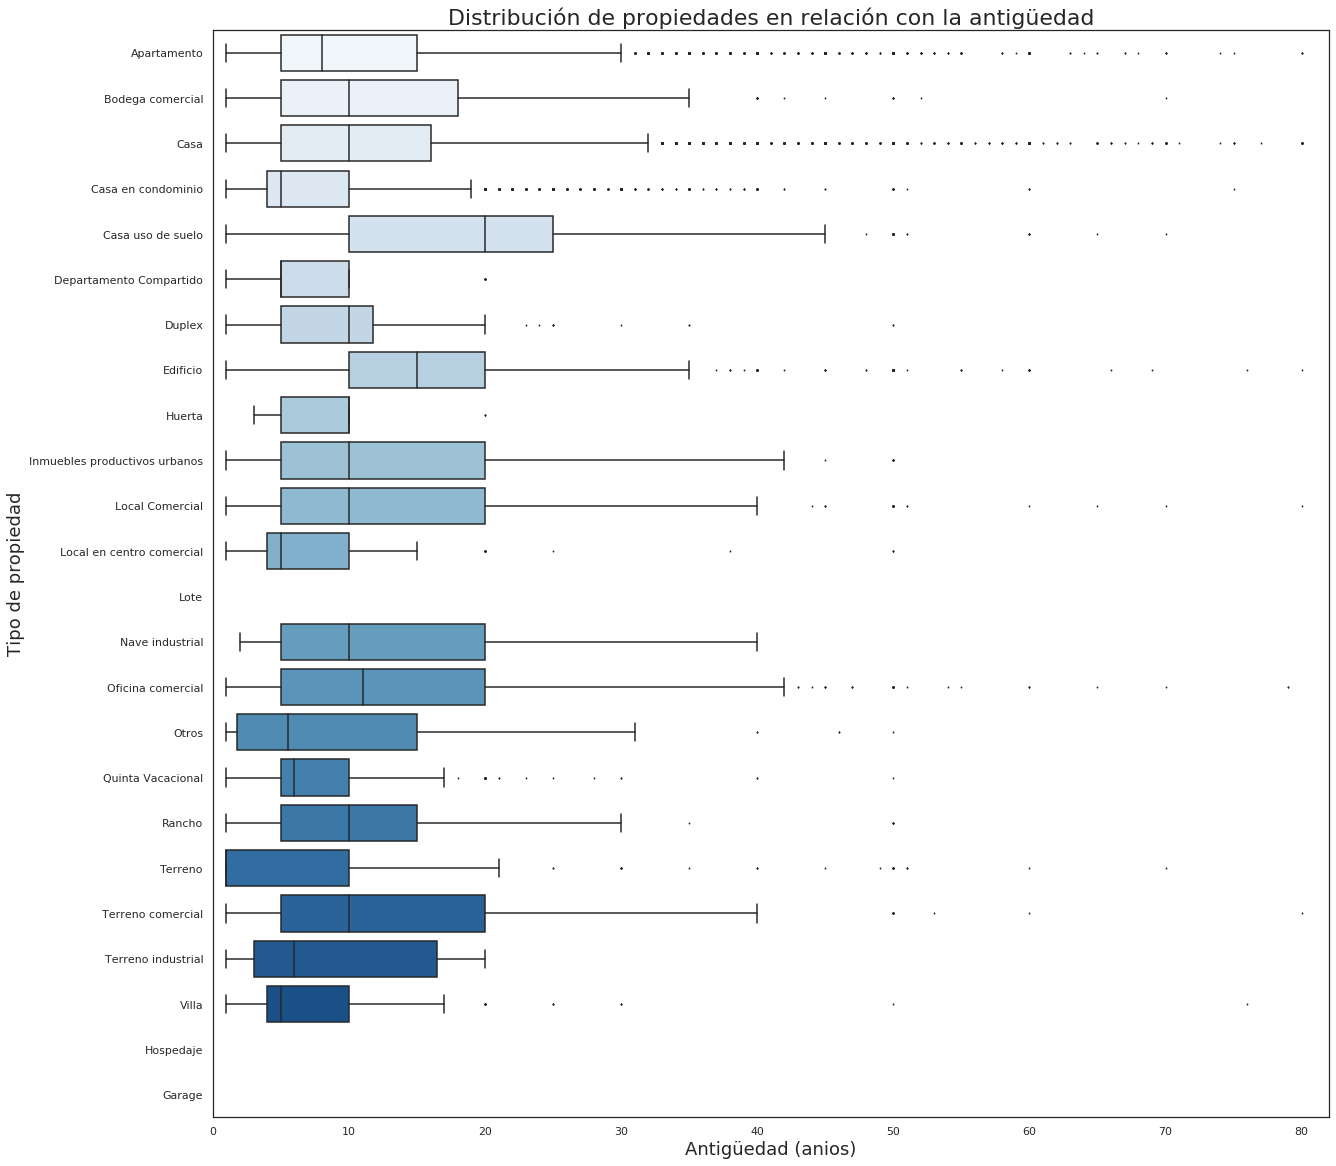

In [361]:
plt.figure(figsize=(20, 20))
plt.ticklabel_format(style='plain')
sns.set(style="whitegrid")
g = sns.boxplot( y=datos['tipodepropiedad'], x=datos['antiguedad'],fliersize=1,palette='Blues')
g.set_title("Distribución de propiedades en relación con la antigüedad", fontsize=22)
g.set_xlabel("Antigüedad (anios)",fontsize=18)
g.set_ylabel("Tipo de propiedad", fontsize=18)
g.set_xlim((0,82))
g.figure.savefig("distribucion_propiedades_antiguedad.png",bbox_inches='tight')

# Heatmap 

Queremos analizar el precio según tipo de propiedad en relación con la antigüedad. Para ello generamos un heatmap que muestra la relación entre todos ellos. 
Agrupamos el dataframe por 'tipodepropiedad' y 'antiguedad' y calculamos el precio promedio para cada valor agrupado. Luego filtramos por aquellos cuyo promedio es mayor a cero, para agregar claridad al gráfico.

In [362]:
pd.options.display.float_format = '{:20,.2f}'.format
datos_hm = datos.groupby(['tipodepropiedad','antiguedad'])['precio'].agg(['mean']).fillna(0).reset_index().copy()
datos_hm.head(10)

,tipodepropiedad,antiguedad,mean
0,Apartamento,1,"3,316,170.74"
1,Apartamento,2,"3,499,709.06"
2,Apartamento,3,"3,257,087.61"
3,Apartamento,4,"3,327,739.31"
4,Apartamento,5,"2,926,547.85"
5,Apartamento,6,"2,899,290.97"
6,Apartamento,7,"2,594,681.86"
7,Apartamento,8,"2,779,938.72"
8,Apartamento,9,"2,471,477.54"
9,Apartamento,10,"1,957,124.17"


In [363]:
datos_hm.loc[(datos_hm['mean']) > 0]
datos_hm.head()

,tipodepropiedad,antiguedad,mean
0,Apartamento,1,"3,316,170.74"
1,Apartamento,2,"3,499,709.06"
2,Apartamento,3,"3,257,087.61"
3,Apartamento,4,"3,327,739.31"
4,Apartamento,5,"2,926,547.85"


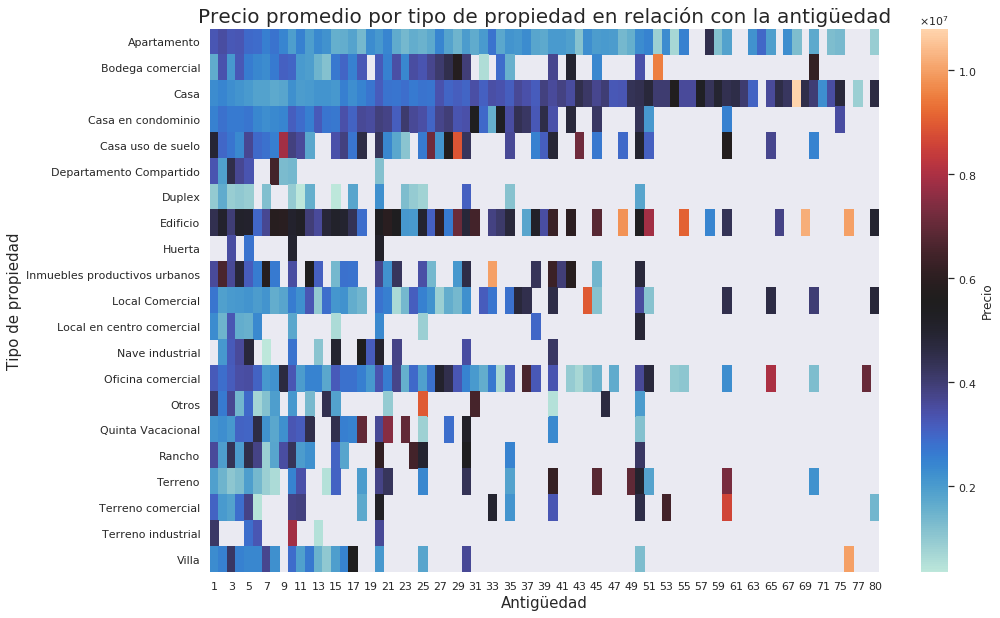

In [364]:
#Heatmap

plt.figure(figsize=(15, 10))
sns.set_style("darkgrid")

# Formateo los numeros de la sidebar
formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))

pivote = datos_pru.pivot("tipodepropiedad", "antiguedad", "mean")
plt.ticklabel_format(style='plain', axis='cbar') #fix de visualización del eje y
grafico = sns.heatmap(pivote, cmap='icefire',cbar_kws={'label': 'Precio','format':formatter})
grafico.set_title('Precio promedio por tipo de propiedad en relación con la antigüedad', fontsize=20)

grafico.set_xlabel('Antigüedad',fontsize=15)
grafico.set_ylabel('Tipo de propiedad', fontsize=15)
grafico.figure.savefig('heatmap-precio-antiguedad.png',bbox_inches='tight')

## Funciones generadoras de gráficos

In [365]:
def generar_regplot(df,dic_cualidades):
    #Generador de regplot
    plt.figure(figsize=(15, 9))
    plt.ticklabel_format(style='plain', axis='y') #fix de visualización del eje y
    
    grafico = sns.regplot(marker = 'x', x=dic_cualidades['x'], y=dic_cualidades['y'], data=df, color=dic_cualidades['color'], x_bins = 6, x_estimator = np.mean)
    grafico.set_title(dic_cualidades['titulo'], fontsize=20)
    grafico.set_xlabel(dic_cualidades['x_label'],fontsize=15)
    grafico.set_ylabel(dic_cualidades['y_label'], fontsize=15)
    grafico.figure.savefig(dic_cualidades['savefig'],bbox_inches='tight')

In [366]:
def generar_scatterplot(df,dic_cualidades):
    #Generador de scatterplot
    sns.set(style="white")
    plt.figure(figsize=(15, 9))
    plt.ticklabel_format(style='plain', axis='y') #fix de visualización del eje y

    grafico = sns.scatterplot(hue = dic_cualidades['hue'], x=dic_cualidades['x'], y=dic_cualidades['y'], data=df, palette = dic_cualidades['palette'])
    grafico.set_title(dic_cualidades['titulo'], fontsize=20)
    grafico.set_xlabel(dic_cualidades['x_label'],fontsize=15)
    grafico.set_ylabel(dic_cualidades['y_label'], fontsize=15)
    grafico.figure.savefig(dic_cualidades['savefig'],bbox_inches='tight')

# Casas vs Apartamentos
Ahora queremos enfocarnos en 'Casa' y 'Apartamento', ya que queremos analizar si existe alguna relación entre antigüedad para una casa y para un apartamento.

## Casas

In [367]:
#Filtramos para las casas
datos_ca = datos.loc[datos['tipodepropiedad'] == 'Casa'].copy()
datos_ca.head()

,precio,antiguedad,tipodepropiedad
2,1200000,5,Casa
3,650000,1,Casa
7,4200000,2,Casa
13,3000000,20,Casa
24,3900000,4,Casa


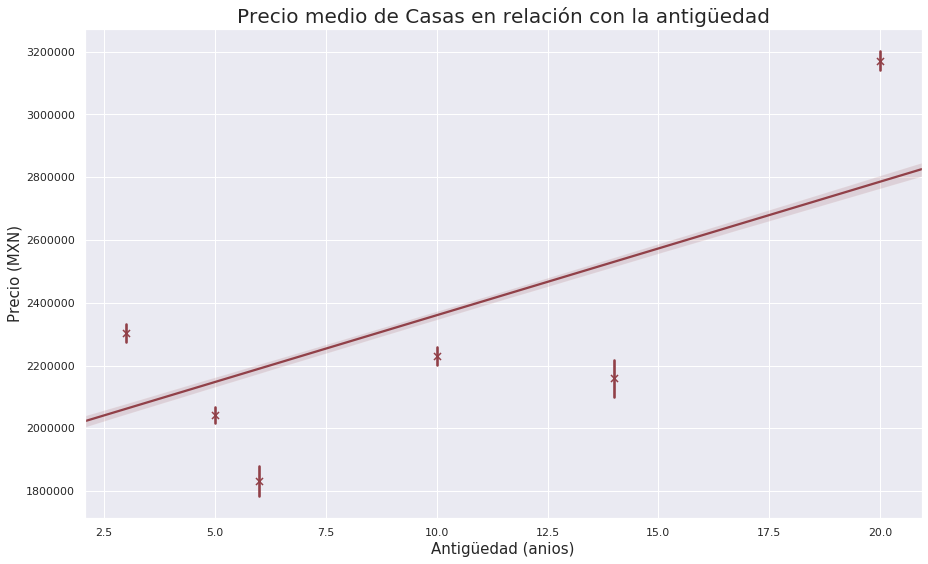

In [368]:
# Para las casas
cualidades_casa = {"x": "antiguedad",
                          "y": "precio",
                          "color" : "#914048",
                          "titulo": "Precio medio de Casas en relación con la antigüedad",
                          "x_label": "Antigüedad (anios)",
                          "y_label":"Precio (MXN)",
                          "savefig": "regplot_precio_antiguedad_casa.png"}

generar_regplot(datos_ca,cualidades_casa)

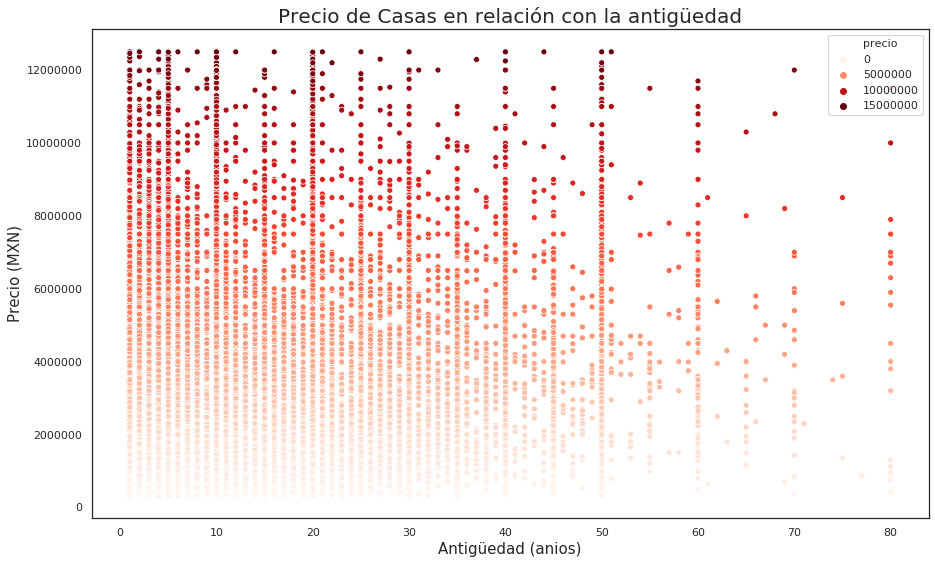

In [369]:
cualidades_casa = {"x":"antiguedad",
                          "y":"precio",
                          "hue": "precio",
                          "titulo": "Precio de Casas en relación con la antigüedad", 
                          "x_label": "Antigüedad (anios)", 
                          "y_label":"Precio (MXN)",
                          "savefig": "splot_precio_antiguedad_casa.png",
                          "palette": "Reds"}

generar_scatterplot(datos_ca,cualidades_casa)

## Apartamentos

In [370]:
#Para los apartamentos
datos_ap = datos.loc[datos['tipodepropiedad'] == 'Apartamento'].copy()

datos_ap.head(10)

,precio,antiguedad,tipodepropiedad
4,1150000,10,Apartamento
5,1100000,5,Apartamento
8,310000,1,Apartamento
17,4750000,5,Apartamento
39,980000,20,Apartamento
41,525000,10,Apartamento
43,1450000,3,Apartamento
51,680000,20,Apartamento
54,750000,4,Apartamento
55,4050000,6,Apartamento


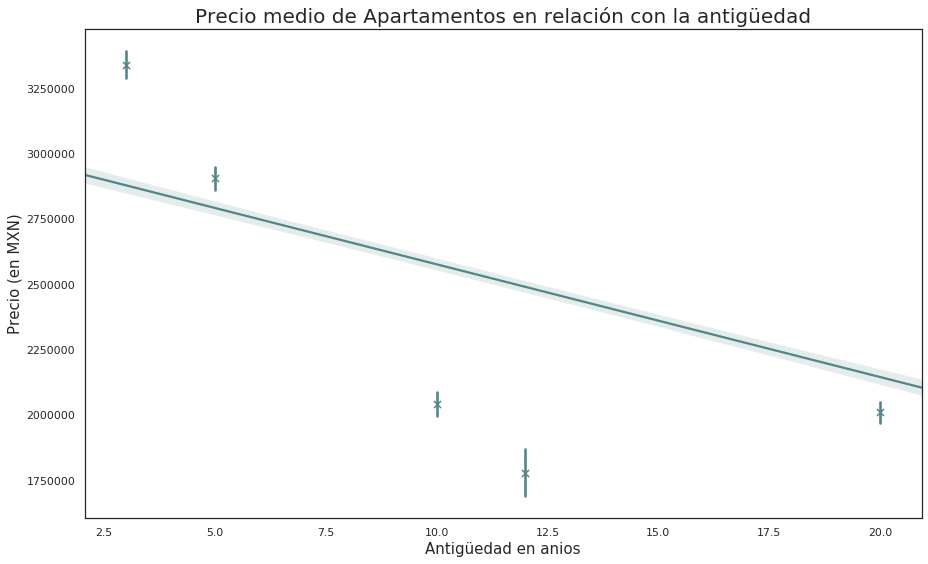

In [371]:
# Para los apartamentos
cualidades_apartamento = {"x": "antiguedad",
                          "y": "precio",
                          "color" : "#548687",
                          "titulo": "Precio medio de Apartamentos en relación con la antigüedad",
                          "x_label": "Antigüedad en anios",
                          "y_label":"Precio (en MXN)",
                          "savefig": "regplot_precio_antiguedad_depa.png"}

generar_regplot(datos_ap,cualidades_apartamento)

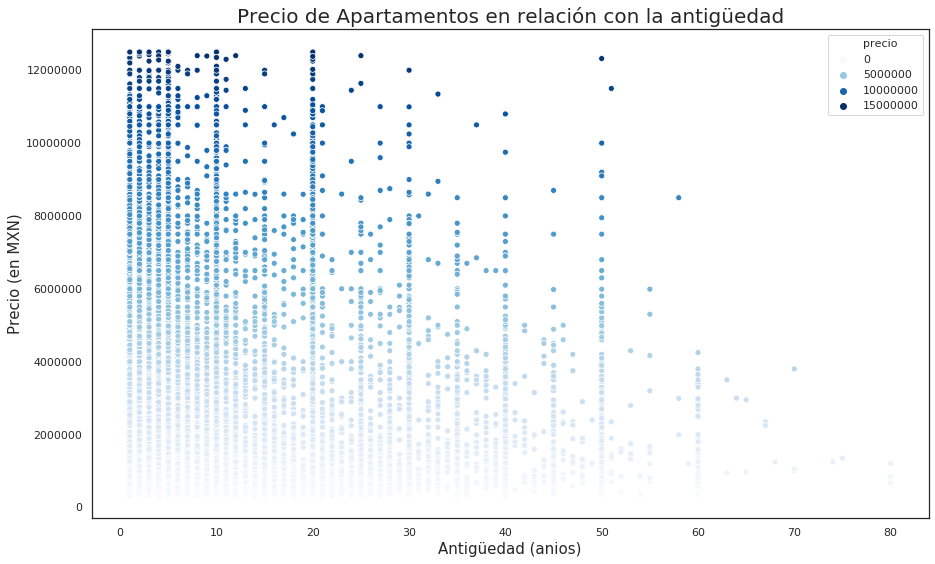

In [372]:
cualidades_apartamento = {"x":"antiguedad",
                          "y":"precio",
                          "hue": "precio",
                          "titulo": "Precio de Apartamentos en relación con la antigüedad", 
                          "x_label": "Antigüedad (anios)", 
                          "y_label":"Precio (en MXN)",
                          "savefig": "splot_precio_antiguedad_depa.png",
                          "palette": "Blues"}

generar_scatterplot(datos_ap,cualidades_apartamento)

In [373]:
datos.head(10)

,precio,antiguedad,tipodepropiedad
1,3600000,10,Casa en condominio
2,1200000,5,Casa
3,650000,1,Casa
4,1150000,10,Apartamento
5,1100000,5,Apartamento
7,4200000,2,Casa
8,310000,1,Apartamento
13,3000000,20,Casa
17,4750000,5,Apartamento
23,3500000,4,Casa en condominio
